In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better visualization
sns.set(style="whitegrid")


In [7]:
df = pd.read_csv('voltedge_energy_usage_P6.csv')

print("Dataset Loaded Successfully.")


Dataset Loaded Successfully.


In [8]:
print("\n--- First 5 Rows ---")
print(df.head())



--- First 5 Rows ---
            Timestamp  Outdoor_Temp  Is_Holiday  Hour  Energy_Demand_MW
0  2020-01-01 0:00:00     18.576412           0     0        519.524110
1  2020-01-01 1:00:00     40.572217           1     1        631.595039
2  2020-01-01 2:00:00     22.832619           0     2        585.525686
3  2020-01-01 3:00:00     33.298120           0     3        756.287306
4  2020-01-01 4:00:00     18.453781           0     4        735.272942


In [9]:
print("\n--- Dataset Info ---")
df.info()



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33889 entries, 0 to 33888
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         33889 non-null  object 
 1   Outdoor_Temp      33889 non-null  float64
 2   Is_Holiday        33889 non-null  int64  
 3   Hour              33889 non-null  int64  
 4   Energy_Demand_MW  33889 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.3+ MB


In [10]:
print("\n--- Statistical Summary ---")
print(df.describe())



--- Statistical Summary ---
       Outdoor_Temp    Is_Holiday          Hour  Energy_Demand_MW
count  33889.000000  33889.000000  33889.000000      33889.000000
mean      20.028071      0.049397     11.499661        342.122846
std       10.029474      0.216698      6.922468        223.105184
min      -29.203402      0.000000      0.000000       -285.400267
25%       13.299488      0.000000      5.000000        190.956009
50%       20.042065      0.000000     11.000000        342.369792
75%       26.825715      0.000000     17.000000        508.241832
max       57.674909      1.000000     23.000000       1042.834076


In [11]:
print("\n--- Missing Values Count ---")
print(df.isnull().sum())



--- Missing Values Count ---
Timestamp           0
Outdoor_Temp        0
Is_Holiday          0
Hour                0
Energy_Demand_MW    0
dtype: int64


In [12]:
print("\n--- Duplicate Rows ---")
print("Number of duplicate rows:", df.duplicated().sum())



--- Duplicate Rows ---
Number of duplicate rows: 0


In [13]:
print("Duplicates before removal:", df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("Duplicates after removal:", df.duplicated().sum())
print("Shape after removing duplicates:", df.shape)


Duplicates before removal: 0
Duplicates after removal: 0
Shape after removing duplicates: (33889, 5)


In [14]:
df['Timestamp'] = pd.to_datetime(
    df['Timestamp'],
    dayfirst=True,
    errors='coerce'   # Converts invalid values to NaT instead of crashing
)


In [15]:
print("Invalid timestamps (if any):")
print(df['Timestamp'].isnull().sum())


Invalid timestamps (if any):
20353


In [16]:
df = df.dropna(subset=['Timestamp'])


In [17]:
df['Timestamp'].isnull().sum()


np.int64(0)

In [18]:
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek


In [19]:
df.drop('Timestamp', axis=1, inplace=True)

print("Timestamp column dropped.")


Timestamp column dropped.


In [20]:
print("\n--- Dataset Info After Cleaning ---")
df.info()

print("\n--- First 5 Rows After Cleaning ---")
print(df.head())



--- Dataset Info After Cleaning ---
<class 'pandas.core.frame.DataFrame'>
Index: 13536 entries, 0 to 33887
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Outdoor_Temp      13536 non-null  float64
 1   Is_Holiday        13536 non-null  int64  
 2   Hour              13536 non-null  int32  
 3   Energy_Demand_MW  13536 non-null  float64
 4   Day               13536 non-null  int32  
 5   Month             13536 non-null  int32  
 6   DayOfWeek         13536 non-null  int32  
dtypes: float64(2), int32(4), int64(1)
memory usage: 634.5 KB

--- First 5 Rows After Cleaning ---
   Outdoor_Temp  Is_Holiday  Hour  Energy_Demand_MW  Day  Month  DayOfWeek
0     18.576412           0     0        519.524110    1      1          2
1     40.572217           1     1        631.595039    1      1          2
2     22.832619           0     2        585.525686    1      1          2
3     33.298120           0     3     

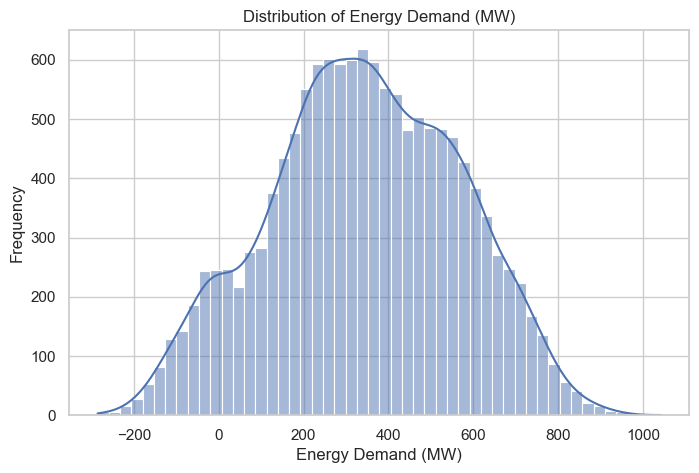

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df['Energy_Demand_MW'], kde=True)
plt.title("Distribution of Energy Demand (MW)")
plt.xlabel("Energy Demand (MW)")
plt.ylabel("Frequency")
plt.show()


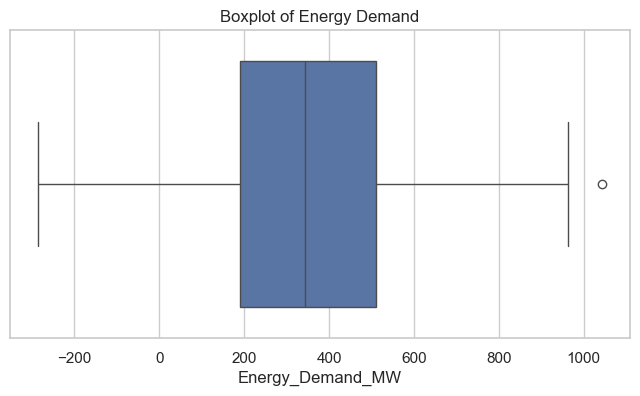

In [22]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Energy_Demand_MW'])
plt.title("Boxplot of Energy Demand")
plt.show()


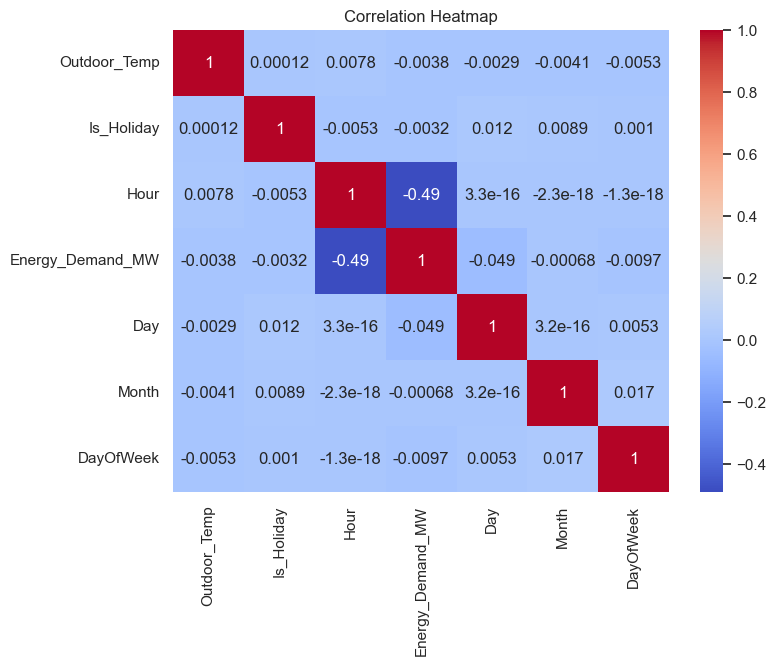

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


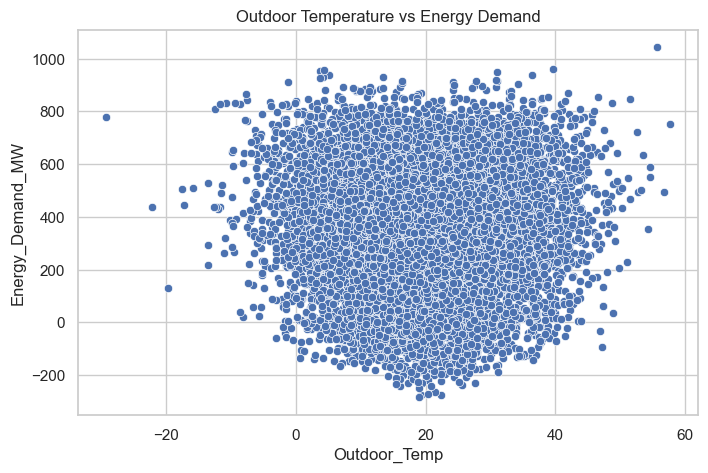

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Outdoor_Temp'], y=df['Energy_Demand_MW'])
plt.title("Outdoor Temperature vs Energy Demand")
plt.show()


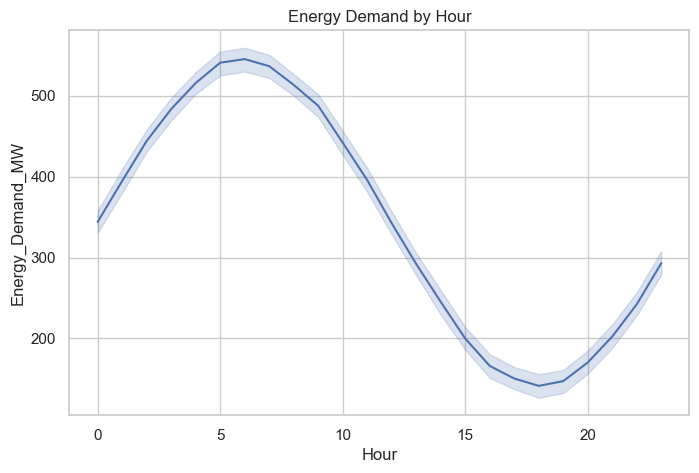

In [25]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Hour', y='Energy_Demand_MW', data=df)
plt.title("Energy Demand by Hour")
plt.show()


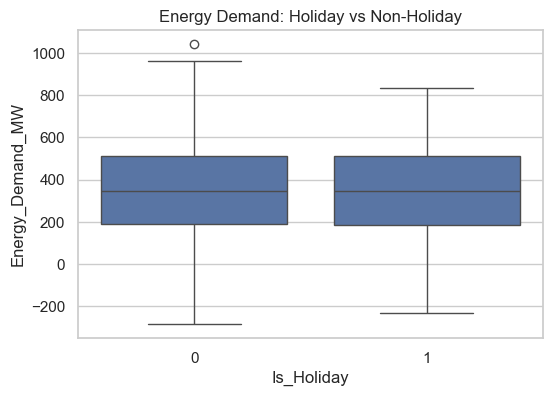

In [26]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Is_Holiday', y='Energy_Demand_MW', data=df)
plt.title("Energy Demand: Holiday vs Non-Holiday")
plt.show()


In [27]:
Q1 = df['Energy_Demand_MW'].quantile(0.25)
Q3 = df['Energy_Demand_MW'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

outliers = df[(df['Energy_Demand_MW'] < lower_limit) | 
              (df['Energy_Demand_MW'] > upper_limit)]

print("Number of Outliers:", len(outliers))


Lower Limit: -292.45401481249996
Upper Limit: 993.4727840875
Number of Outliers: 1


In [28]:
df = df[(df['Energy_Demand_MW'] >= lower_limit) &
        (df['Energy_Demand_MW'] <= upper_limit)]

print("Rows after removing outlier:", len(df))


Rows after removing outlier: 13535


In [29]:
df['Temp_Hour_Interaction'] = df['Outdoor_Temp'] * df['Hour']

print(df[['Outdoor_Temp', 'Hour', 'Temp_Hour_Interaction']].head())


   Outdoor_Temp  Hour  Temp_Hour_Interaction
0     18.576412     0               0.000000
1     40.572217     1              40.572217
2     22.832619     2              45.665239
3     33.298120     3              99.894359
4     18.453781     4              73.815126


In [30]:
df['Temp_Squared'] = df['Outdoor_Temp'] ** 2

print(df[['Outdoor_Temp', 'Temp_Squared']].head())


   Outdoor_Temp  Temp_Squared
0     18.576412    345.083067
1     40.572217   1646.104823
2     22.832619    521.328509
3     33.298120   1108.764781
4     18.453781    340.542051


In [31]:
print(df.head())
print(df.info())


   Outdoor_Temp  Is_Holiday  Hour  Energy_Demand_MW  Day  Month  DayOfWeek  \
0     18.576412           0     0        519.524110    1      1          2   
1     40.572217           1     1        631.595039    1      1          2   
2     22.832619           0     2        585.525686    1      1          2   
3     33.298120           0     3        756.287306    1      1          2   
4     18.453781           0     4        735.272942    1      1          2   

   Temp_Hour_Interaction  Temp_Squared  
0               0.000000    345.083067  
1              40.572217   1646.104823  
2              45.665239    521.328509  
3              99.894359   1108.764781  
4              73.815126    340.542051  
<class 'pandas.core.frame.DataFrame'>
Index: 13535 entries, 0 to 33887
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Outdoor_Temp           13535 non-null  float64
 1   Is_Holiday           

In [32]:
X = df.drop('Energy_Demand_MW', axis=1)
y = df['Energy_Demand_MW']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (13535, 8)
Target shape: (13535,)


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

print("Scaling completed.")
print("First 5 rows of scaled data:")
print(X_scaled[:5])


Scaling completed.
First 5 rows of scaled data:
[[-0.14400632 -0.22641143 -1.66138689 -1.58641353 -1.59318176 -0.5122832
  -1.20143815 -0.36676428]
 [ 2.06172316  4.41673814 -1.5169245  -1.58641353 -1.59318176 -0.5122832
  -0.9901513   2.71454906]
 [ 0.28280428 -0.22641143 -1.37246211 -1.58641353 -1.59318176 -0.5122832
  -0.9636285   0.05065183]
 [ 1.33227993 -0.22641143 -1.22799972 -1.58641353 -1.59318176 -0.5122832
  -0.68122096  1.44192389]
 [-0.15630361 -0.22641143 -1.08353732 -1.58641353 -1.59318176 -0.5122832
  -0.81703309 -0.37751912]]


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (10828, 8)
Testing shape: (2707, 8)


In [35]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print("PCA transformation completed.")


PCA transformation completed.


In [36]:
explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio:")
print(explained_variance)


Explained Variance Ratio:
[0.31476698 0.16812495 0.12781134 0.1258334  0.12404398 0.12227901
 0.01095518 0.00618514]


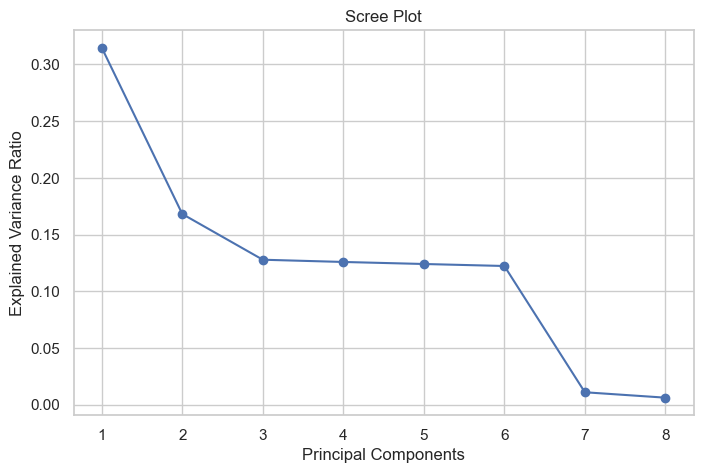

In [37]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.show()


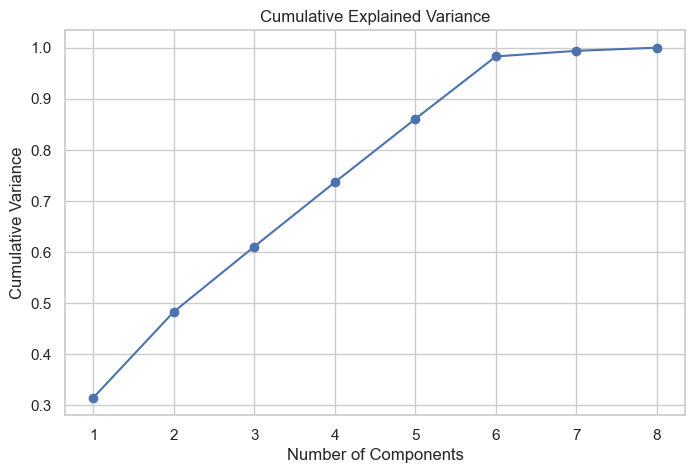

In [38]:
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.show()


In [39]:
pca = PCA(n_components=4)
X_pca_final = pca.fit_transform(X_scaled)


In [40]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca_final, y, 
    test_size=0.2, 
    random_state=42
)


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Results:
MAE: 158.62767285515352
MSE: 37317.03404647726
RMSE: 193.17617359932683
R2 Score: 0.2508578993070052


In [42]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print("\nRidge Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("R2 Score:", r2_score(y_test, y_pred_ridge))



Ridge Regression Results:
MAE: 158.62579302341803
MSE: 37316.1064696657
RMSE: 193.17377272721495
R2 Score: 0.2508765204771738


In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))



Random Forest Results:
MAE: 149.88892500919664
MSE: 33113.44859167196
RMSE: 181.97101030568567
R2 Score: 0.3352451749445404


In [44]:
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train_pca)

y_pred_lr_pca = lr_pca.predict(X_test_pca)

print("\nLinear Regression with PCA:")
print("R2 Score:", r2_score(y_test_pca, y_pred_lr_pca))



Linear Regression with PCA:
R2 Score: 0.2391371769241406


In [45]:
from sklearn.model_selection import cross_val_score

rf_base = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

cv_scores = cross_val_score(
    rf_base,
    X_train,
    y_train,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

print("Cross-validation R2 scores:", cv_scores)
print("Average CV R2:", cv_scores.mean())


Cross-validation R2 scores: [0.34108316 0.35400025 0.31798356 0.3451134  0.36807502]
Average CV R2: 0.34525107831308


In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(
        n_estimators=100,
        random_state=42
    ),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 5}
Best CV Score: 0.39956587548046213


In [47]:
best_rf = grid_search.best_estimator_

y_pred_final = best_rf.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("\nFinal Tuned Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_final))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_final)))
print("R2:", r2_score(y_test, y_pred_final))



Final Tuned Random Forest Performance:
MAE: 143.80519807454039
RMSE: 173.1536106837106
R2: 0.3981057563073509


In [48]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
})

feature_importance = feature_importance.sort_values(
    by='Importance',
    ascending=False
)

print(feature_importance)


                 Feature  Importance
2                   Hour    0.714767
6  Temp_Hour_Interaction    0.067257
0           Outdoor_Temp    0.054735
7           Temp_Squared    0.052643
3                    Day    0.052137
4                  Month    0.030188
5              DayOfWeek    0.025432
1             Is_Holiday    0.002842


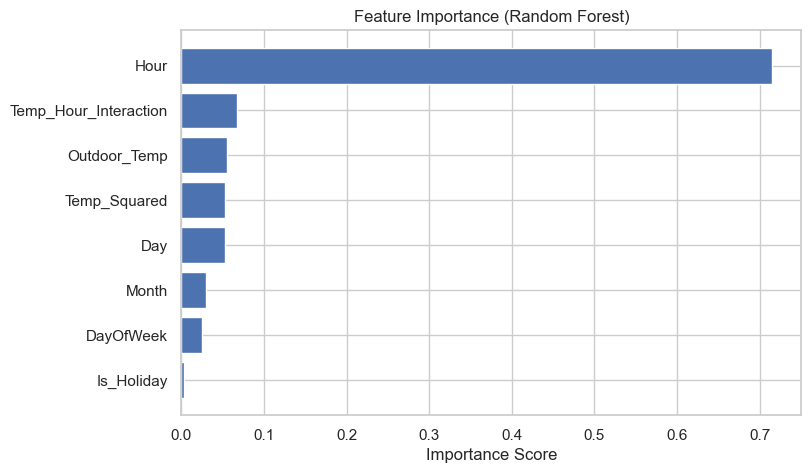

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(feature_importance['Feature'],
         feature_importance['Importance'])
plt.xlabel("Importance Score")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


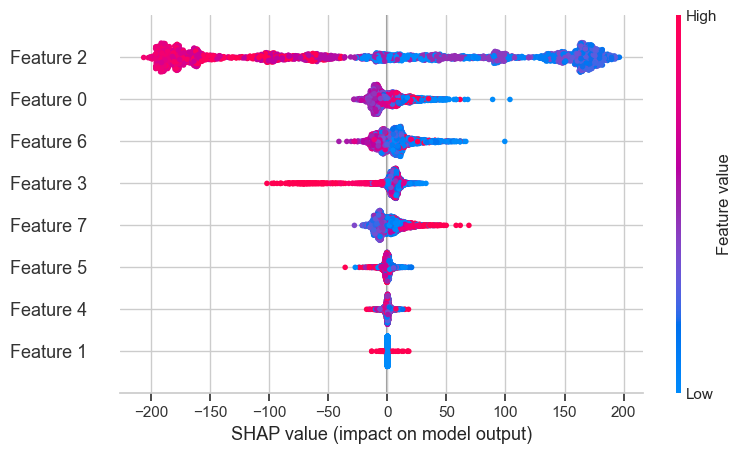

In [50]:

import shap

explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


In [51]:
model_results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Random Forest"],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_final)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_final))
    ]
})

print(model_results)


               Model  R2 Score        RMSE
0  Linear Regression  0.250858  193.176174
1   Ridge Regression  0.250877  193.173773
2      Random Forest  0.398106  173.153611


In [52]:
import joblib

joblib.dump(best_rf, "energy_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully.")


Model and scaler saved successfully.
